# API 2: Plotting

Initialize KAN and create dataset

In [1]:
from kan import *

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[2,5,1], grid=3, k=3, seed=1, device=device)

# create dataset f(x,y) = exp(sin(pi*x)+y^2)
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2, device=device)
dataset['train_input'].shape, dataset['train_label'].shape

cuda
checkpoint directory created: ./model
saving model version 0.0


(torch.Size([1000, 2]), torch.Size([1000, 1]))

Plot KAN at initialization

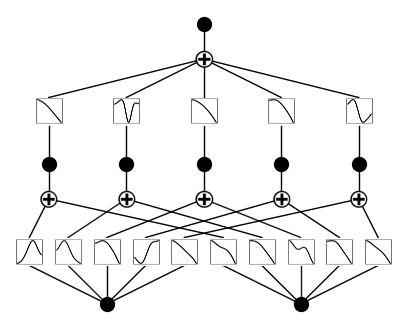

In [2]:
# plot KAN at initialization
model(dataset['train_input']);
model.plot(beta=100)

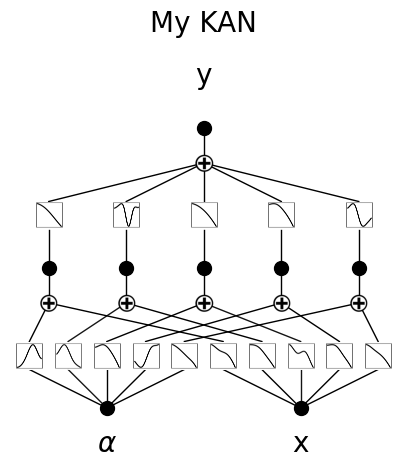

In [3]:
# if you want to add variable names and title
model.plot(beta=100, in_vars=[r'$\alpha$', 'x'], out_vars=['y'], title = 'My KAN')

Train KAN with sparsity regularization

In [4]:
# train the model
model.fit(dataset, opt="LBFGS", steps=20, lamb=0.01);

| train_loss: 5.20e-02 | test_loss: 5.35e-02 | reg: 4.93e+00 | : 100%|█| 20/20 [00:03<00:00,  5.22it

saving model version 0.1


$\beta$ controls the transparency of activations. Larger $\beta$ => more activation functions show up. We usually want to set a proper beta such that only important connections are visually significant. transparency is set to be ${\rm tanh}(\beta \phi)$ where $\phi$ is the scale of the activation function (metric='forward_u'), normalized scale (metric='forward_n') or the feature attribution score (metric='backward'). By default $\beta=3$ and metric='backward'.

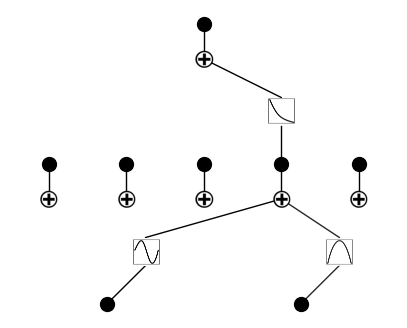

In [5]:
model.plot()

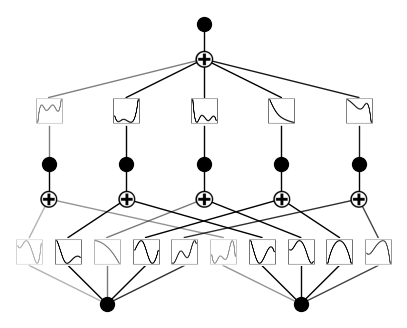

In [6]:
model.plot(beta=100000)

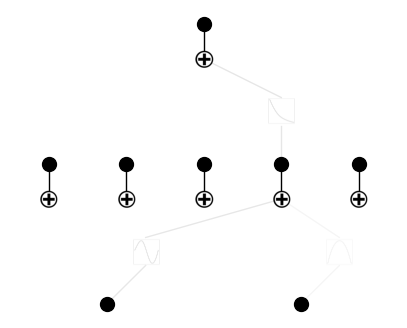

In [7]:
model.plot(beta=0.1)

plotting with different metrics: 'forward_n', 'forward_u', 'backward'

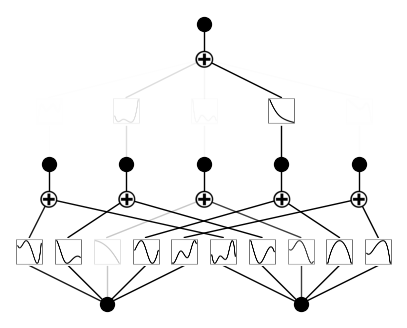

In [8]:
model.plot(metric='forward_n', beta=100)

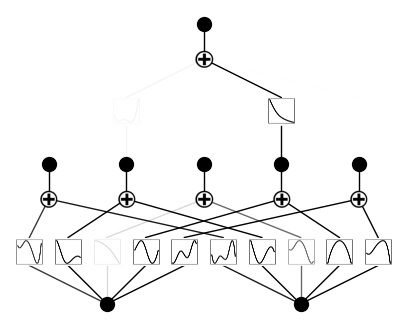

In [9]:
model.plot(metric='forward_u', beta=100)

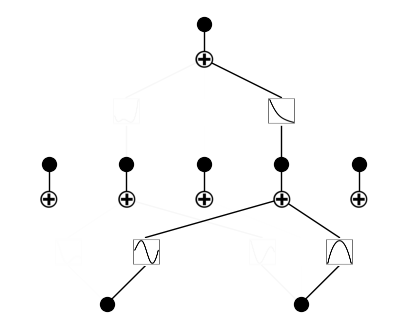

In [10]:
model.plot(metric='backward', beta=100)

Remove insignificant neurons

saving model version 0.2


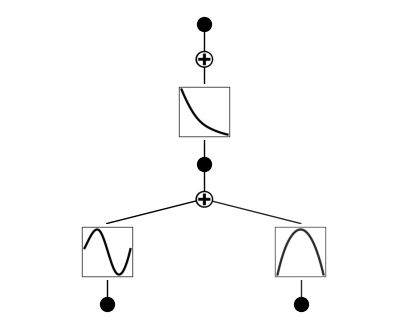

In [11]:
model = model.prune()
model.plot()

Resize the figure using the "scale" parameter. By default: 0.5

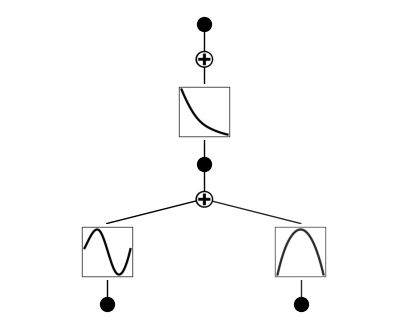

In [12]:
model.plot(scale=0.5)

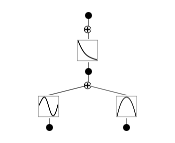

In [13]:
model.plot(scale=0.2)

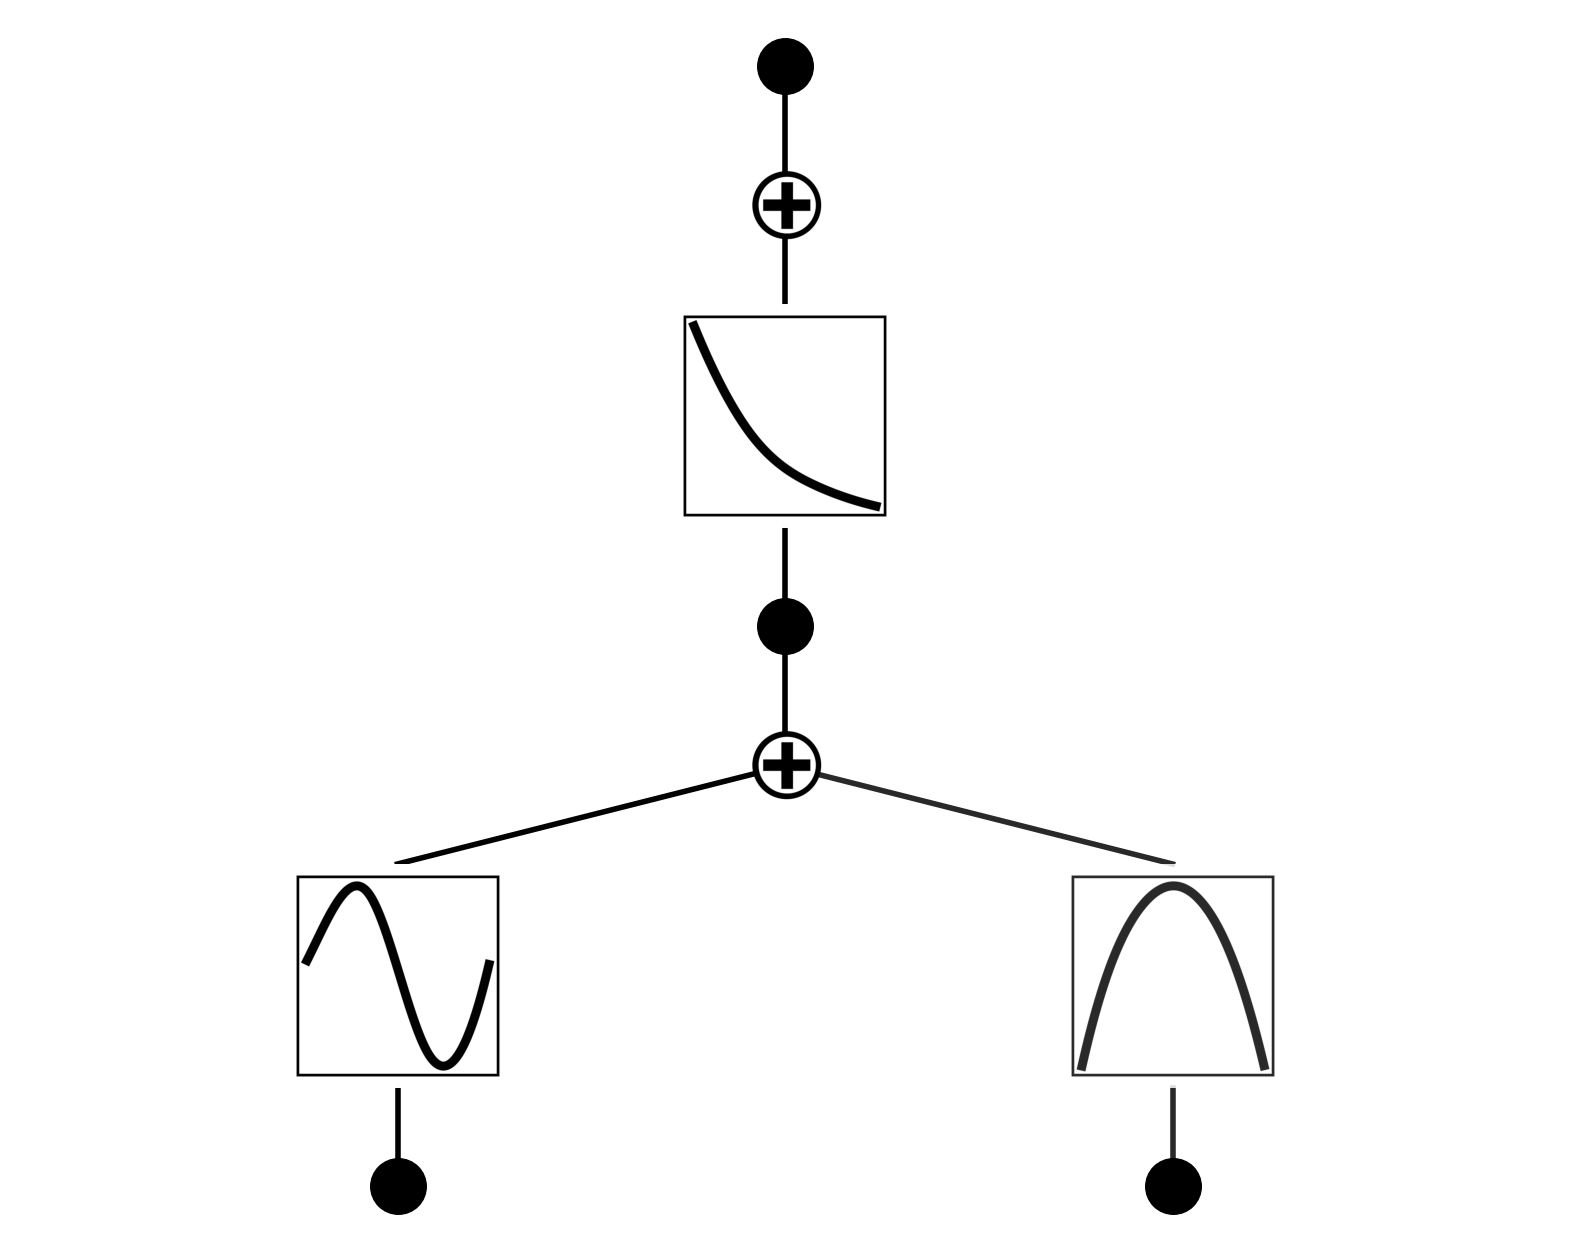

In [14]:
model.plot(scale=2.0)

If you want to see sample distribution in addition to the line, set "sample=True"

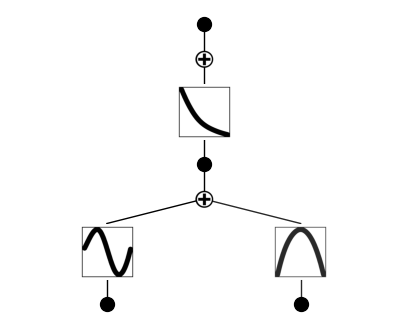

In [15]:
model.plot(sample=True)

The samples are more visible if we use a smaller number of samples

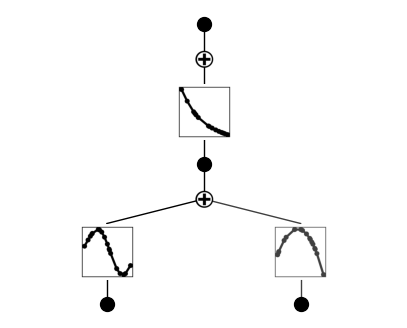

In [16]:
model.get_act(dataset['train_input'][:20])
model.plot(sample=True)

If a function is set to be symbolic, it becomes red

In [17]:
model.fix_symbolic(0,1,0,'x^2')

r2 is 0.9992202520370483
saving model version 0.3


tensor(0.9992, device='cuda:0')

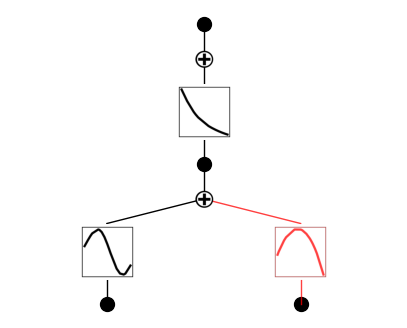

In [18]:
model.plot()

If a function is set to be both symbolic and numeric (its output is the addition of symbolic and spline), then it shows up in purple

In [19]:
model.set_mode(0,1,0,mode='ns')


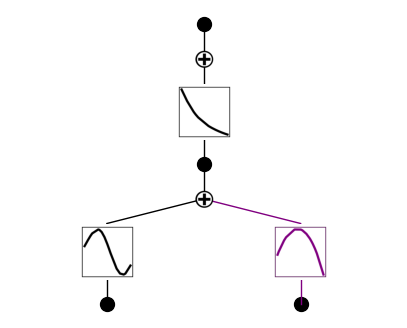

In [20]:
model.plot(beta=100)